### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write up, download this file as a PDF or HTML file and submit in the next section.


(1) What is the independent variable? What is the dependent variable?

The independent variable is congruency of the visual and semantic information.
The dependent variable is response time.

(2) What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

The Null hypothesis H$_{0}$ is that there is no difference in mean ($\mu$) response time between incongruent and congruent tasks. (population mean Congruent time = $\mu_{C}$, population mean Incongruent time= $\mu_{I}$).

$H_{0}: \mu_{C} = \mu_{I}$

The Alternative hypothesis is that there is a difference in response time between incongruent and congruent tasks. 

$H_{1}: \mu_{C} \ne \mu_{I}$


I expect to assume modeling continuous distribution, with a small random sample size, and therefore will perform a two sided, paired t-test on the data to determine significance with an alpha value of .05 - testing if the mean population response time difference between incongruent displays and congruent displays is due to chance. The reason for a t-test is that the sample size is relatively small - Z-tests are for large sample sizes. it is paired because each participant takes both versions and has response times for both congruent and incongruent displays.

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

stroop=pd.read_csv('stroopdata.csv')
stroop.mean()

Congruent      14.051125
Incongruent    22.015917
dtype: float64

In [2]:
stroop.std()

Congruent      3.559358
Incongruent    4.797057
dtype: float64

The incongruent category initially seems to have a higher mean and standard deviation than congruent task.

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

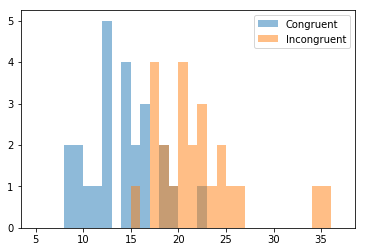

In [3]:
bins = np.linspace(5, 37,33)

plt.hist(stroop.Congruent, bins, alpha=0.5, label='Congruent')
plt.hist(stroop.Incongruent, bins, alpha=0.5, label='Incongruent')
plt.legend(loc='upper right')
plt.show()


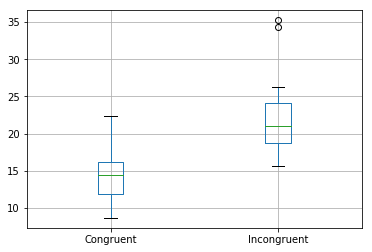

In [4]:
stroop.boxplot()
plt.show()

The histogram shows some overlap in the two distributions, and that the incongruent distribution could potentially have a long tail - however that may just be due to low sample size. The boxplots, showing quartiles, paints a more distinct picture of difference, and highlights the two outliers.

(5) Now, perform the statistical test and report the results. What is the confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [10]:
from scipy import stats

test=stats.ttest_rel(stroop.Incongruent,stroop.Congruent)
test.statistic

8.020706944109957

In [13]:
len(stroop)

24

With a n=24, and therefore a df=23, we can compare our t-statistic with a t-table. 8.02 is beyond 99.95th percentile, indicating that we have strong evidence that there is a difference between the congruent and incongruent response time means. This backed up by the fully calculated p-value:

In [9]:
test.pvalue

4.1030005857111781e-08

As the p value is much less than .05, we can reject the null hypothesis that the two displays have the same response time. 

This matches expectations, as having congruent semantic and visual information means you can use either/both your semantic or visual processing to determine the correct response. A common theory is that semantic processing is faster (due to training, or because visual-to-word procesing requires a "translation" step) than visual processing, meaning if the semantic information matches the correct answer, you can effectively ignore the visual cue and use the faster pathway. When the semantic information is incongruent with the visual, the theory states that we must use the slower pathway while consciously supress the faster pathway - effectively traveling down a slower road with a heavier cognitive load.

Some other simple experiments that could flesh out this theory include:

Performing color identification on colored squares, eliminating semantic component and measuring the "slow" visual pathway speed unimpeded.

Performing color identification on irrelevant words (animals, shape names etc.), to measure suppression of irrelevant vs actively interfering distractors.

having participants respond with practiced color coded key strokes instead of verbal response, to test if the verbal response is the driving force of the "slow" visual pathway.